# Demo No. 6 - Producing synthetic light curves

This demo will finally provide a quick guide trough a process of generating a light curve.

## Defining a binary system

Initially, we will define a binary model as usual:

In [1]:
%matplotlib notebook
from astropy import units as u

from elisa import BinarySystem
from elisa import Star

from elisa import settings

primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=5,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.0,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

2021-09-11 17:51:20,702 - 29836 - binary_system.system - INFO: initialising object BinarySystem
2021-09-11 17:51:20,747 - 29836 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.


## Defining observer class instance

In order to be able to specify observer-dependent parameters of the light curve such as passband we have to define `Observer` class: 

In [2]:
from elisa import Observer

o = Observer(passband=[  # defining passbands at which calculate a light curve
#     'Generic.Bessell.U',
    'Generic.Bessell.B',
    'Generic.Bessell.V',
    'Generic.Bessell.R',
    'Generic.Bessell.I',
                      ],
             system=bs)  # specifying the binary system to use in light curve synthesis

2021-09-11 17:51:20,765 - 29836 - observer.observer - INFO: initialising Observer instance


List of all available passbands can be found here:

In [3]:
settings.PASSBANDS

['bolometric',
 'Generic.Bessell.U',
 'Generic.Bessell.B',
 'Generic.Bessell.V',
 'Generic.Bessell.R',
 'Generic.Bessell.I',
 'SLOAN.SDSS.u',
 'SLOAN.SDSS.g',
 'SLOAN.SDSS.r',
 'SLOAN.SDSS.i',
 'SLOAN.SDSS.z',
 'Generic.Stromgren.u',
 'Generic.Stromgren.v',
 'Generic.Stromgren.b',
 'Generic.Stromgren.y',
 'Kepler',
 'GaiaDR2',
 'TESS']

`Observer` enables to perform ''observations''. Synthetic light curve of our binary system can be produced using function on our `Observer` class instance: 

In [4]:
phases, fluxes = o.observe.lc(
    from_phase=-0.6,
    to_phase=0.6,
    phase_step=0.01,
    normalize=True  # this will produce observations normalized to 1
)

2021-09-11 17:51:20,875 - 29836 - observer.observer - INFO: observation is running
2021-09-11 17:51:22,268 - 29836 - observer.observer - INFO: observation finished


This function returns `phases` in which synthetic light curves were produced and `curves` dictionary with synthetic light curves for every passband specifyied in `observer` class.

In [5]:
fluxes

{'Generic.Bessell.B': array([0.96383773, 0.96108418, 0.95475308, 0.94354739, 0.92890572,
        0.91240941, 0.89601248, 0.88178646, 0.87235472, 0.87033058,
        0.87020866, 0.87033058, 0.87235472, 0.88178646, 0.89601248,
        0.91240941, 0.92890572, 0.94354739, 0.95475308, 0.96108418,
        0.96383773, 0.96676766, 0.96983432, 0.97297798, 0.97625348,
        0.97951216, 0.98274269, 0.98577639, 0.98880293, 0.99150813,
        0.99392902, 0.99608004, 0.99773346, 0.998973  , 0.99971281,
        1.        , 0.99959274, 0.99869837, 0.99723295, 0.99525655,
        0.99265792, 0.98963931, 0.9861821 , 0.98223875, 0.97812367,
        0.97365874, 0.96902949, 0.96426811, 0.95955114, 0.95485496,
        0.95027724, 0.94588957, 0.92722841, 0.89248706, 0.84600383,
        0.79029377, 0.72895206, 0.66657063, 0.61359762, 0.59275607,
        0.58889303, 0.59275607, 0.61359762, 0.66657063, 0.72895206,
        0.79029377, 0.84600383, 0.89248706, 0.92722841, 0.94588957,
        0.95027724, 0.95485

## Visualizing the results

Resulting light curves can be visualized very similarly as in the case of `BinarySystem` instance:

<IPython.core.display.Javascript object>


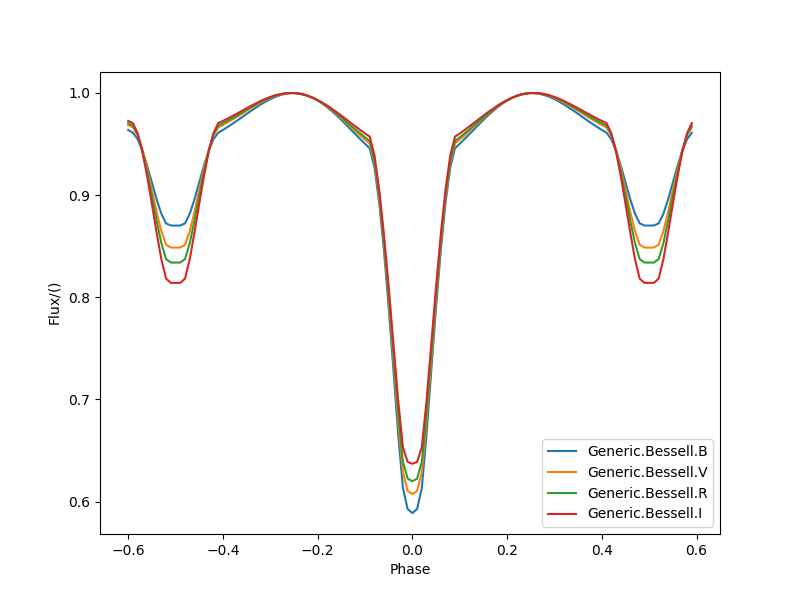

In [6]:
o.plot.phase_curve(phases=phases, fluxes=fluxes)